# Classification Project
## Salaries prediction with 'Adult' dataset <br>

Author: Piotr Druzdzel <br>
E-mail: piotr.druzdzel@gmail.com <br><br>


Data source: UCI Machine Learning Repository <br>
https://archive.ics.uci.edu/ml/datasets/Adult

#### Data Set Information: 
Extraction was done by Barry Becker from the 1994 Census database. Prediction task is to determine whether a person makes over 50K a year. <br>

### Attribute Information: 

<b>age:</b> <br>
Continuous. <br>

<b>workclass:</b> <br>
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. <br>

<b>fnlwgt:</b> <br>
Continuous. Final weight, which is the number of units in the target population that the responding unit represents. <br>

<b>education:</b> <br>
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. <br>

<b>education-num:</b> <br>
Continuous. : The highest level of education achieved in numerical form. <br>

<b>marital-status:</b> <br>
Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. <br>
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. <br>

<b>occupation:</b> <br>
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. <br>

<b>relationship:</b> <br>
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. <br>

<b>race:</b> <br>
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. <br>

<b>sex:</b> <br>
Female, Male. <br>

<b>capital-gain:</b> <br>
Capital gains for an individual. Continuous. <br>

<b>capital-loss:</b> <br>
Capital loss for an individual. Continuous. <br>

<b>hours-per-week:</b> <br>
Continuous. <br>

<b>native-country:</b> <br>
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

Timing the script:

In [2]:
from datetime import datetime
startTime = datetime.now()

Basic libraries:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk

Quick fix for the dark theme plotting to have readable labels:

In [2]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

## Importing the data:

Training data:

In [3]:
df_training_original = pd.read_csv('training.data', 
                          names=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])

Test data:

In [4]:
df_test_original = pd.read_csv('test.test', 
                          names=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                 "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                 "Week-Hours", "Native-country", "Salary"])

Making a copy of the original imported data:

In [5]:
df_test = df_test_original.copy()
df_training = df_training_original.copy()

Check the data:

In [6]:
df_training

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df_test

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


## Exploratory Data Analysis (EDA):

Training data:

In [8]:
df_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   FNLWGT          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   Education-num   32561 non-null  int64 
 5   Marital-status  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  Capital-gain    32561 non-null  int64 
 11  Capital-loss    32561 non-null  int64 
 12  Week-Hours      32561 non-null  int64 
 13  Native-country  32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Test data:

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   FNLWGT          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-num   16281 non-null  int64 
 5   Marital-status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-gain    16281 non-null  int64 
 11  Capital-loss    16281 non-null  int64 
 12  Week-Hours      16281 non-null  int64 
 13  Native-country  16281 non-null  object
 14  Salary          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


Descriptions of basic statistics:

In [10]:
df_training.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df_test.describe()

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


Basic check for missing values (further checks will show that there actually ARE missing values, just marked with "?" as a placeholder):

In [12]:
df_training.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

In [13]:
df_test.isnull().sum()

Age               0
Workclass         0
FNLWGT            0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Week-Hours        0
Native-country    0
Salary            0
dtype: int64

Correlation between the variables:

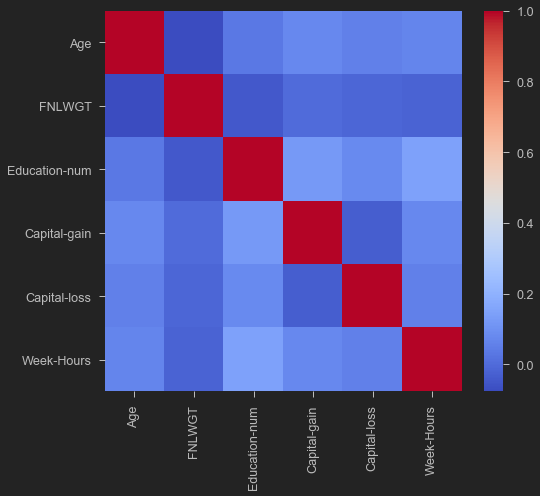

In [14]:
sns.heatmap(df_training.corr(), cmap='coolwarm')

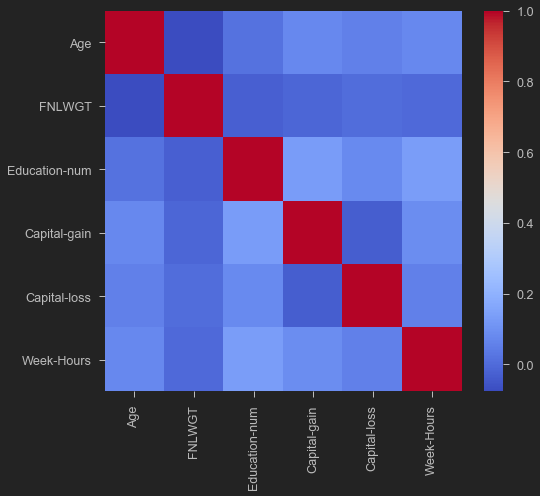

In [15]:
sns.heatmap(df_test.corr(), cmap='coolwarm')

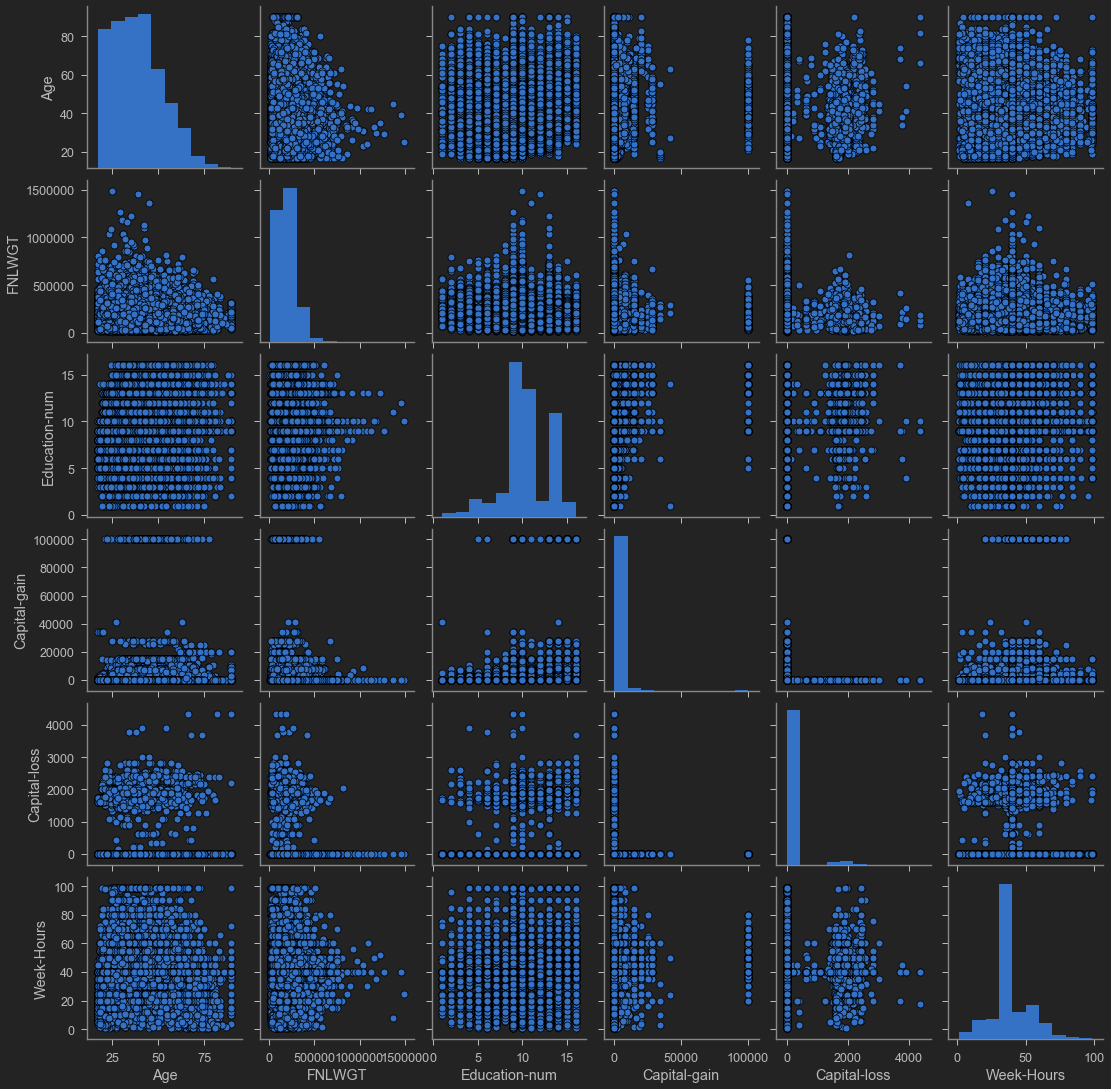

In [16]:
sns.pairplot(df_training, plot_kws=dict(edgecolor="black"))

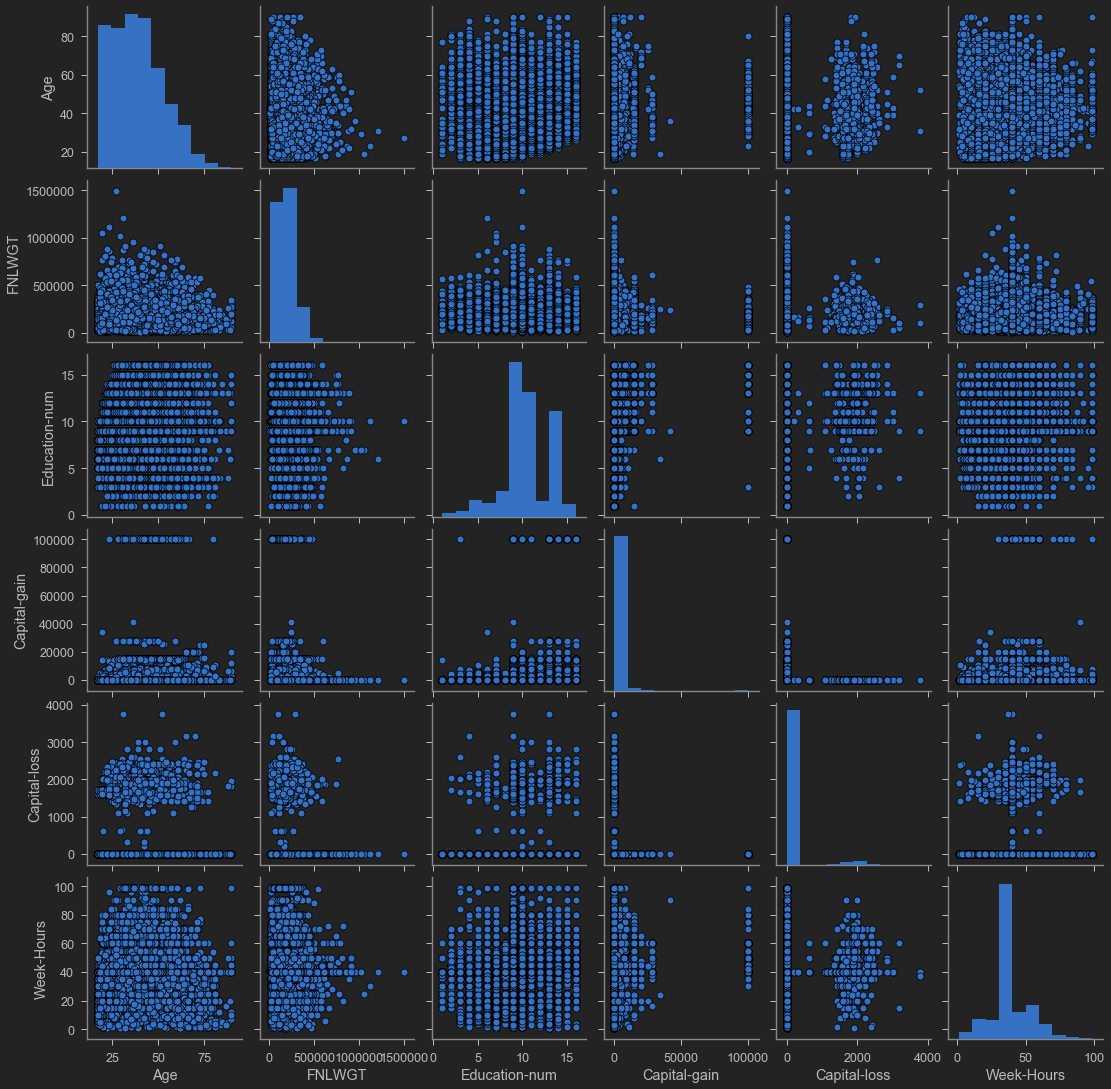

In [17]:
sns.pairplot(df_test, plot_kws=dict(edgecolor="black"))

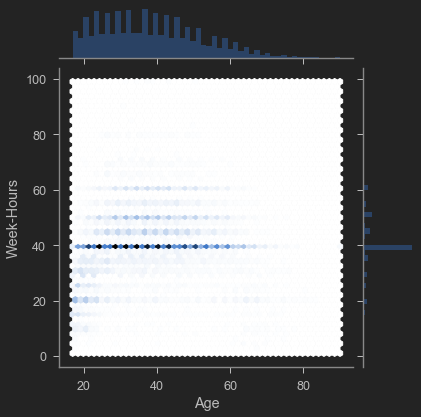

In [18]:
sns.jointplot(x='Age',y='Week-Hours',data=df_training, kind='hex');

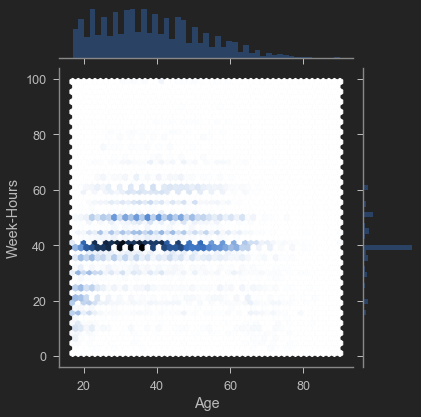

In [19]:
sns.jointplot(x='Age',y='Week-Hours',data=df_test, kind='hex');

The dataset split provided is reasonable. The test set takes up ~33% of all the data and is <u>representative</u>.

## Concatenating Training and Test sets
For clarity and consistent pre-processing I decided to temporary concatenate training and test dataframes that initially came separately from UCI. I will split them again before the training.

In [20]:
#Test set:
#df.iloc[32561:,:]

In [21]:
df = pd.concat([df_training, df_test], ignore_index=True)

# <span style="color:orange"> Temporary slice for prototyping: </span>

In [22]:
df = df.sample(frac=0.1, random_state=42)

### Salary (dependent variable):

In [23]:
df['Salary'].unique()

array([' <=50K', ' <=50K.', ' >50K', ' >50K.'], dtype=object)

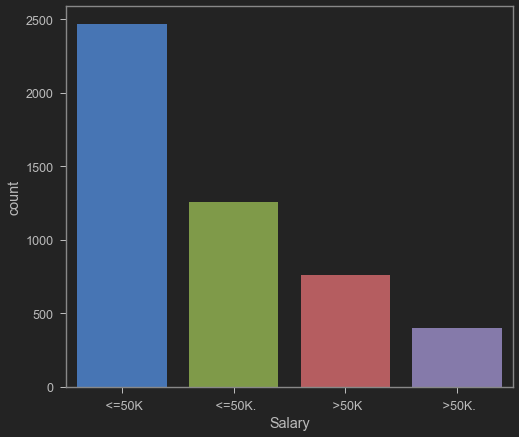

In [24]:
sns.countplot(df['Salary'])

In [25]:
d = {' <=50K': 0, ' <=50K.': 0, ' >50K': 1,' >50K.': 1}
df['Salary'] = df['Salary'].map(d)

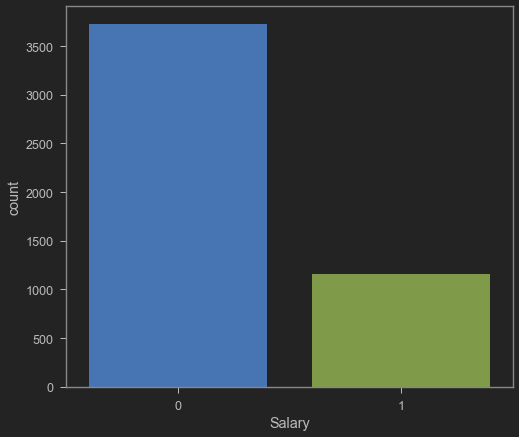

In [26]:
sns.countplot(df['Salary']);

We have imbalance dataset. The influence of balancing to be checked later.

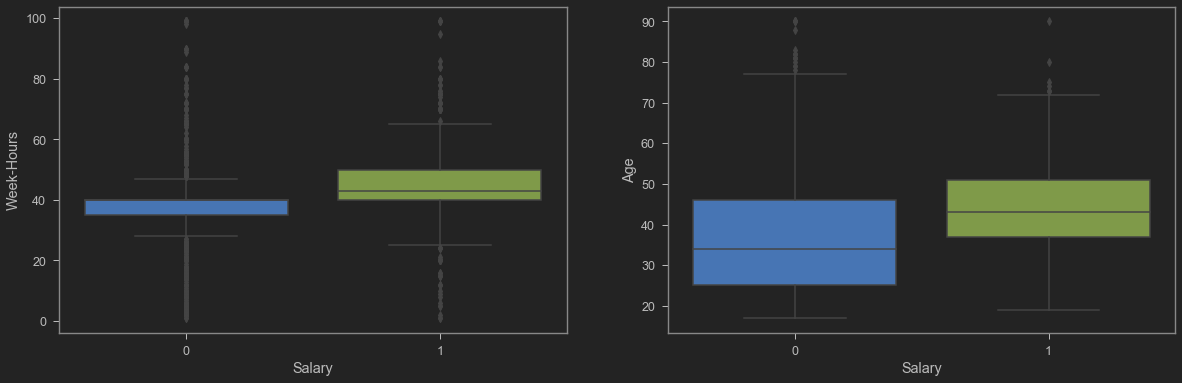

In [27]:
fig, (a,b)= plt.subplots(1,2,figsize=(20,6))
sns.boxplot(y='Week-Hours',x='Salary',data=df,ax=a)
sns.boxplot(y='Age',x='Salary',data=df,ax=b);

People working more than 40 hrs per week and in their early 40s are more likely to earn over 50 000.

## Missing data
Even though there are no missing values from .isnull() and .info() methods we can see "?" in some cells. 
Although the data is theoretically indeed not missing there, the "?" placeholder does not add any value. There can be many different placeholders so just searching for "?" might not be sufficient. Let's inspect the columns for suspicious values:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884 entries, 7762 to 29572
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             4884 non-null   int64 
 1   Workclass       4884 non-null   object
 2   FNLWGT          4884 non-null   int64 
 3   Education       4884 non-null   object
 4   Education-num   4884 non-null   int64 
 5   Marital-status  4884 non-null   object
 6   Occupation      4884 non-null   object
 7   Relationship    4884 non-null   object
 8   Race            4884 non-null   object
 9   Sex             4884 non-null   object
 10  Capital-gain    4884 non-null   int64 
 11  Capital-loss    4884 non-null   int64 
 12  Week-Hours      4884 non-null   int64 
 13  Native-country  4884 non-null   object
 14  Salary          4884 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 770.5+ KB


### Age

In [29]:
df['Age'].unique()

array([18, 17, 25, 20, 47, 33, 38, 21, 43, 55, 46, 34, 40, 50, 29, 62, 56,
       74, 31, 36, 64, 32, 52, 45, 27, 19, 26, 37, 49, 22, 24, 90, 60, 28,
       65, 48, 54, 66, 35, 42, 39, 44, 30, 63, 51, 71, 53, 68, 58, 70, 59,
       23, 57, 41, 72, 82, 73, 61, 75, 69, 77, 67, 88, 76, 81, 80, 83, 78,
       79], dtype=int64)

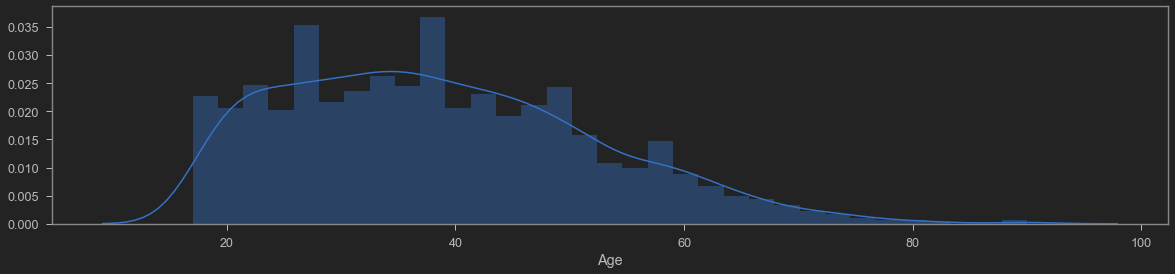

In [30]:
plt.figure(figsize=(20,4))
sns.distplot(df['Age']);

The dataset is dominated by young people between 20 and 40 years.

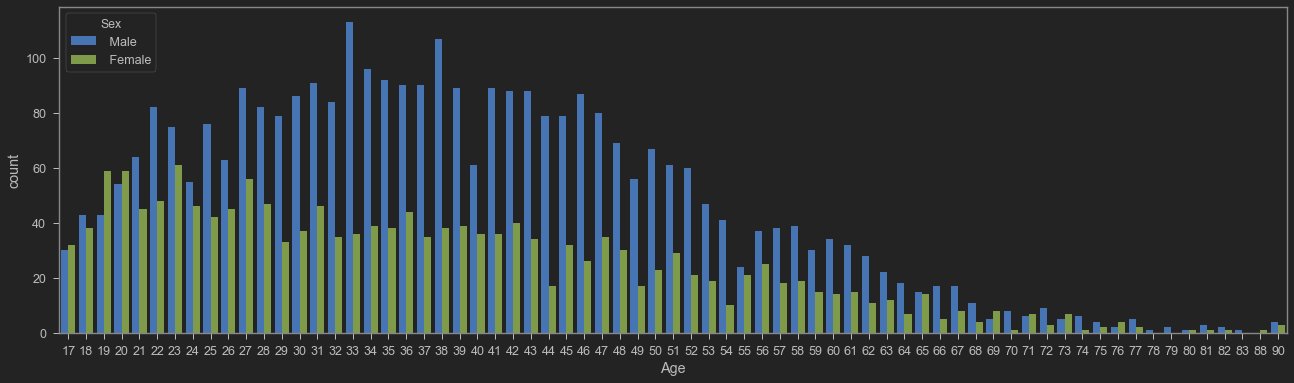

In [31]:
plt.figure(figsize=(22,6))
sns.countplot(df['Age'], hue=df['Sex']);

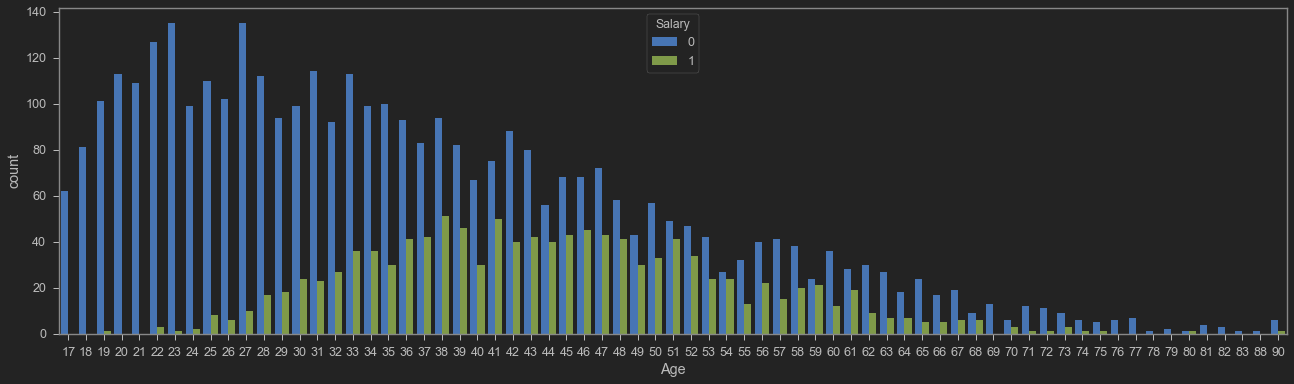

In [32]:
plt.figure(figsize=(22,6))
sns.countplot(df['Age'], hue=df['Salary']);

The largest group of representants are people in their 30s:

In [33]:
df['Age'].mode().head(3)

0    33
dtype: int64

### Work class

In [34]:
df['Workclass'].unique()

array([' Private', ' Local-gov', ' ?', ' Federal-gov', ' State-gov',
       ' Self-emp-not-inc', ' Self-emp-inc', ' Without-pay'], dtype=object)

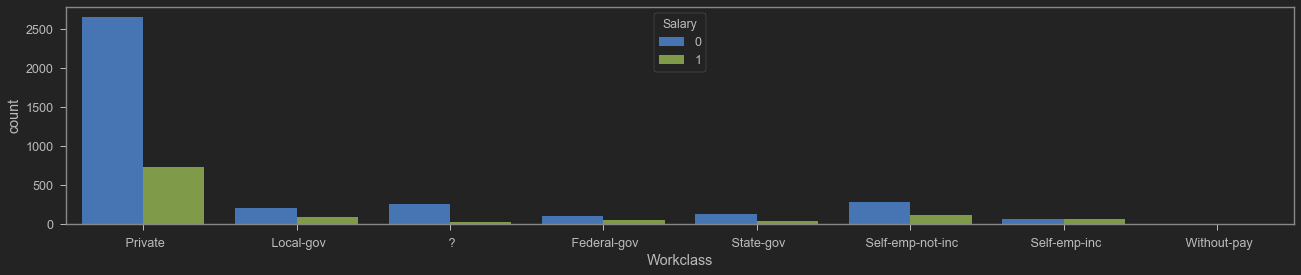

In [35]:
plt.figure(figsize=(22,4))
sns.countplot(df['Workclass'], hue=df['Salary']);

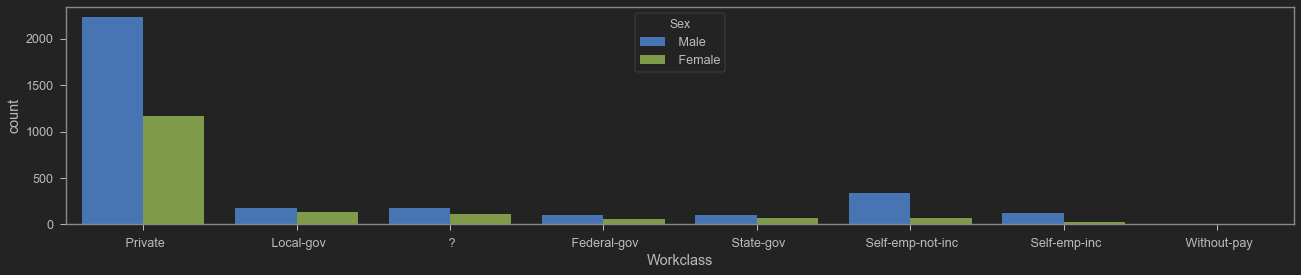

In [36]:
plt.figure(figsize=(22,4))
sns.countplot(df['Workclass'], hue=df['Sex']);

The dataset represent mostly men, employed in private companies.

### Education:

In [37]:
df['Education'].sort_values().unique()

array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
       ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
       ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
       ' Some-college'], dtype=object)

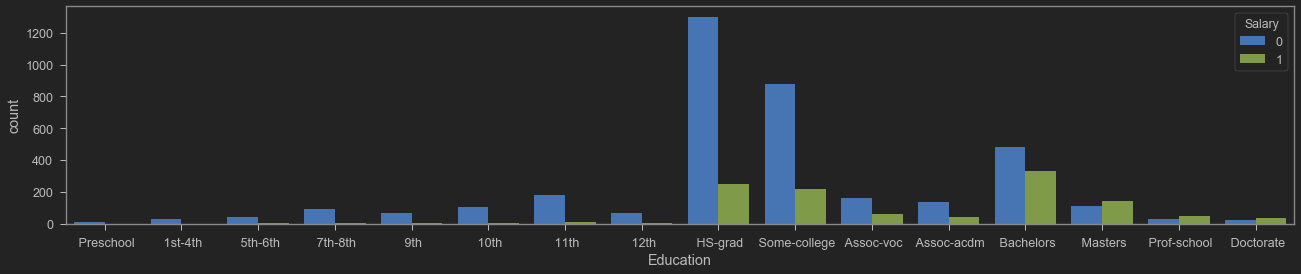

In [38]:
plt.figure(figsize=(22,4))
sns.countplot(df['Education'],
              hue=df['Salary'],
              order=[' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', ' HS-grad', 
                     ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate']);

### Education number

In [39]:
df['Education-num'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=int64)

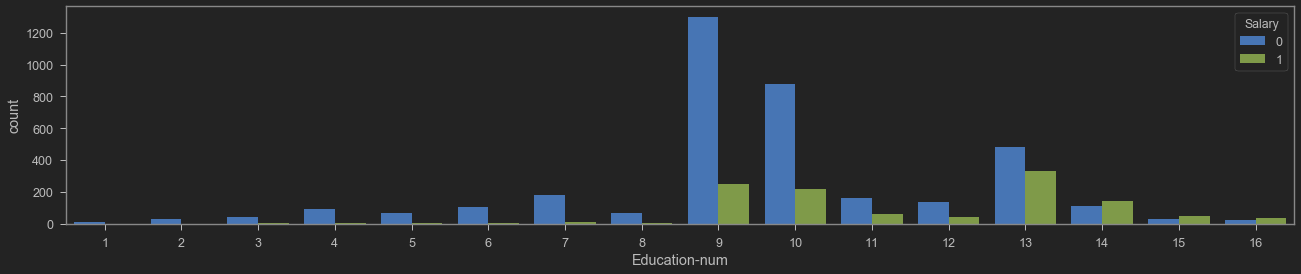

In [40]:
plt.figure(figsize=(22,4))
sns.countplot(df['Education-num'], hue=df['Salary']);

### Marital status

In [41]:
df['Marital-status'].sort_values().unique()

array([' Divorced', ' Married-AF-spouse', ' Married-civ-spouse',
       ' Married-spouse-absent', ' Never-married', ' Separated',
       ' Widowed'], dtype=object)

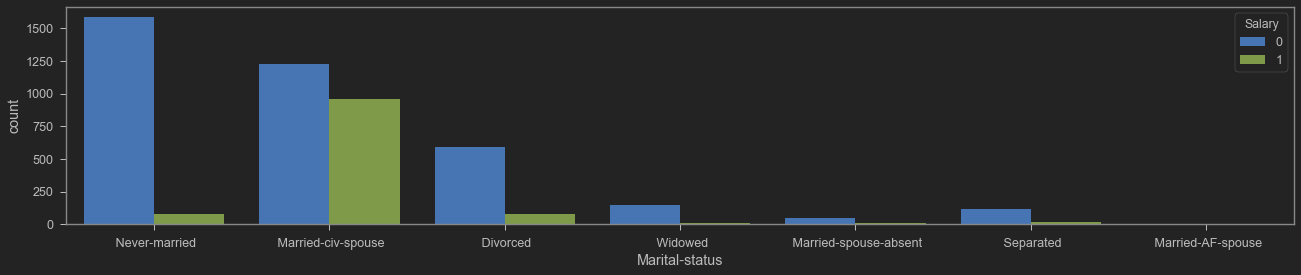

In [42]:
plt.figure(figsize=(22,4))
sns.countplot(df['Marital-status'], hue=df['Salary']);

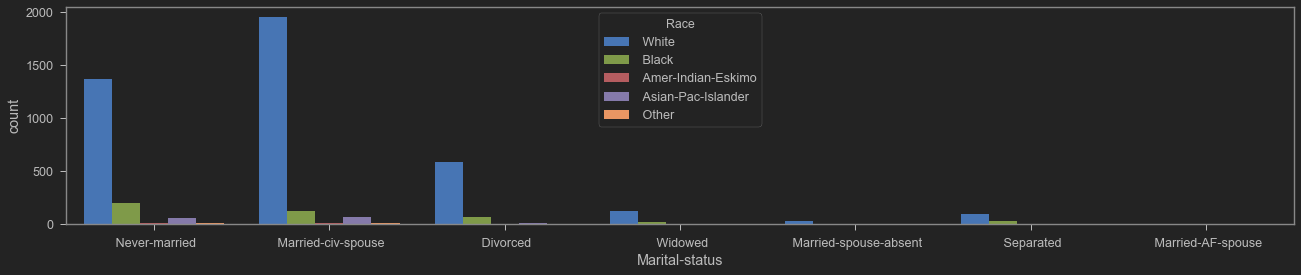

In [43]:
plt.figure(figsize=(22,4))
sns.countplot(df['Marital-status'], hue=df['Race']);

### Occupation:

In [44]:
df['Occupation'].sort_values().unique()

array([' ?', ' Adm-clerical', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving'], dtype=object)

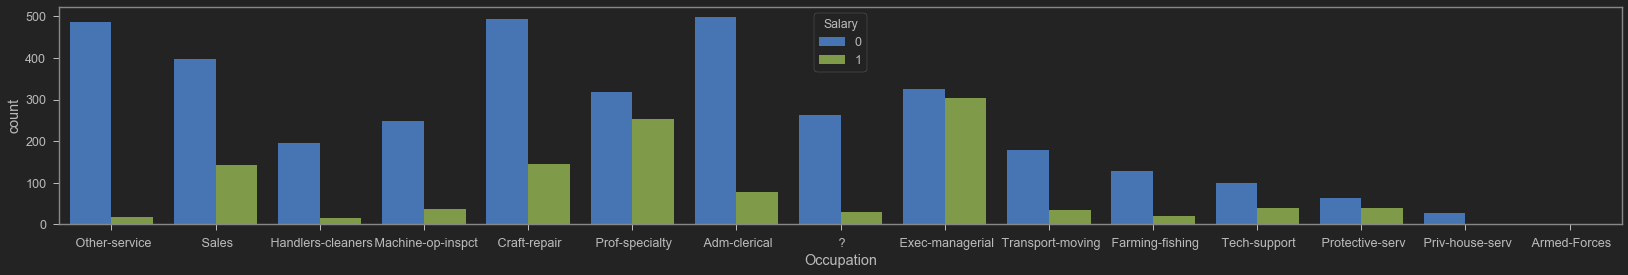

In [45]:
plt.figure(figsize=(28,4))
sns.countplot(df['Occupation'], hue=df['Salary']);

### Relationship

In [46]:
df['Relationship'].sort_values().unique()

array([' Husband', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife'], dtype=object)

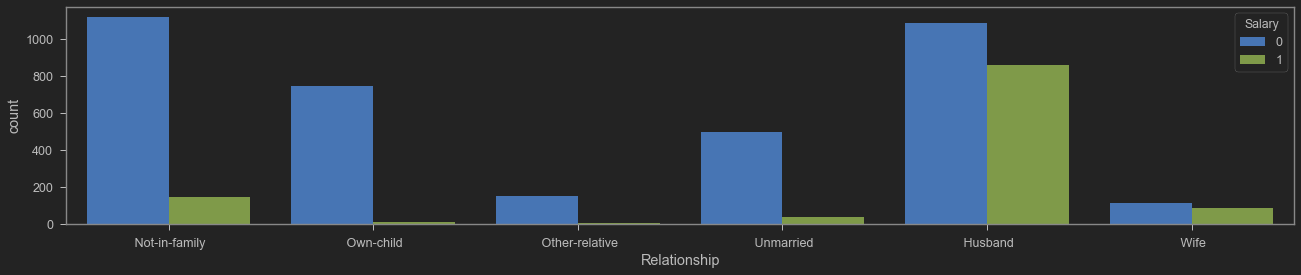

In [47]:
plt.figure(figsize=(22,4))
sns.countplot(df['Relationship'], hue=df['Salary']);

### Race:

In [48]:
df['Race'].sort_values().unique()

array([' Amer-Indian-Eskimo', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White'], dtype=object)

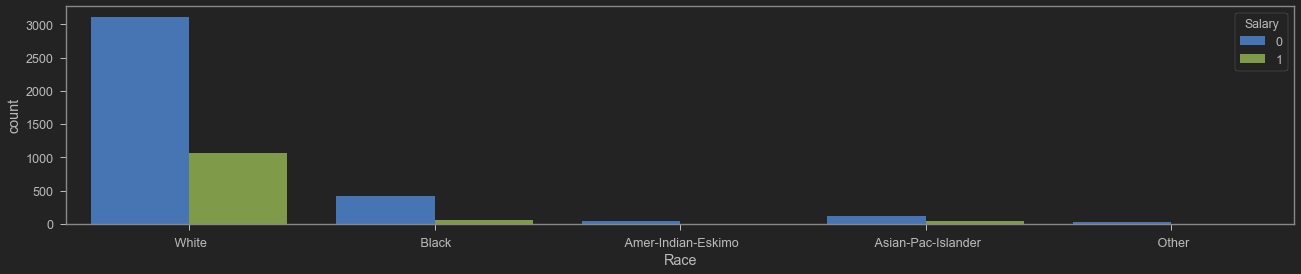

In [49]:
plt.figure(figsize=(22,4))
sns.countplot(df['Race'], hue=df['Salary']);

### Sex:

In [50]:
df['Sex'].unique()

array([' Male', ' Female'], dtype=object)

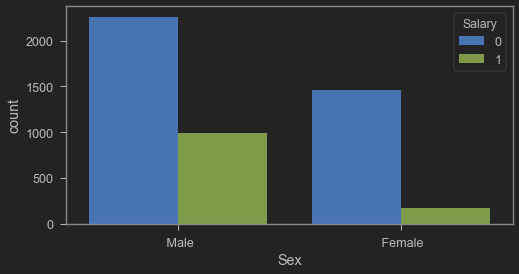

In [51]:
plt.figure(figsize=(8,4))
sns.countplot(df['Sex'], hue=df['Salary']);

### Capital gain:

In [52]:
df['Capital-gain'].unique()

array([    0,  4650,  2407,  3471, 15020, 15024,  7298,  7688,  4064,
        8614,  3411, 13550,  4865,  1506,  3464, 99999,  2354,  3103,
        4101, 14084,  4386,  3456,  2907,  5178,  2174,  2635,  2977,
        5013,  3942, 27828,  3781, 10605,  2597,   594, 10520,  2538,
        9386,  3418,  4787, 20051,  4508, 14344,  1086,  2176,  1831,
        6767,  6418,  3325,  2829,  1055,  2105,  7896,  4416,  6849,
        1455,  7978,  2463,  5721,  2414,  3137, 22040,  4934,  1848,
        1173,  7430,  2885,  2062,  3432,  9562,  2228,   914,  2202,
         114,  5556,  2387, 25124], dtype=int64)

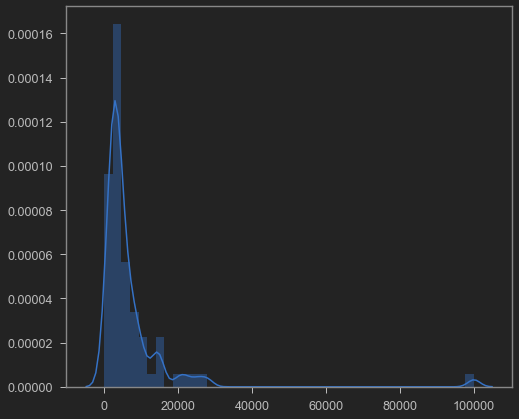

In [53]:
sns.distplot(df['Capital-gain'].unique())

In [54]:
df[df['Capital-gain'] == 99999].count()

Age               26
Workclass         26
FNLWGT            26
Education         26
Education-num     26
Marital-status    26
Occupation        26
Relationship      26
Race              26
Sex               26
Capital-gain      26
Capital-loss      26
Week-Hours        26
Native-country    26
Salary            26
dtype: int64

Whereas 0s are possible, the 244 instances of 99999s look suspicious and are probably just a placeholder for missing values.

In [55]:
df[df['Capital-gain'] == 0].count()

Age               4509
Workclass         4509
FNLWGT            4509
Education         4509
Education-num     4509
Marital-status    4509
Occupation        4509
Relationship      4509
Race              4509
Sex               4509
Capital-gain      4509
Capital-loss      4509
Week-Hours        4509
Native-country    4509
Salary            4509
dtype: int64

In [56]:
df[df['Capital-gain'] == 0]['Age'].count()/df['Age'].count()

0.9232186732186732

92% of the people had Capital-gain equal to 0.

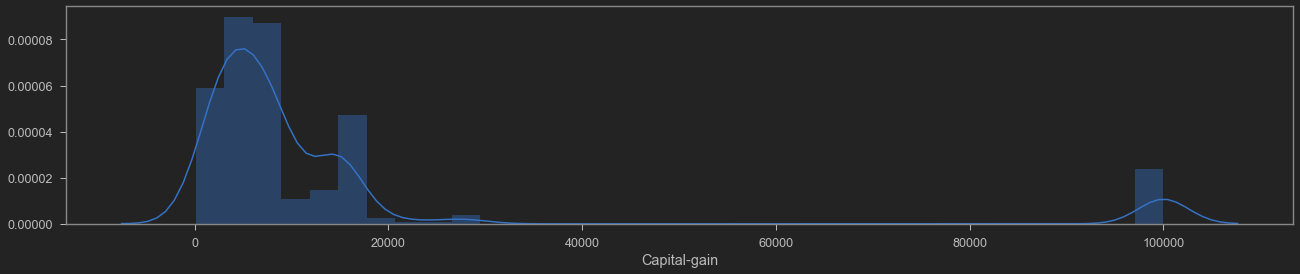

In [57]:
plt.figure(figsize=(22,4))
sns.distplot(df[df['Capital-gain'] > 0]['Capital-gain']);

Checking where are located the faulty 99999s. Let's remember I concatenated earlier the test set (rows ~32000-48000):

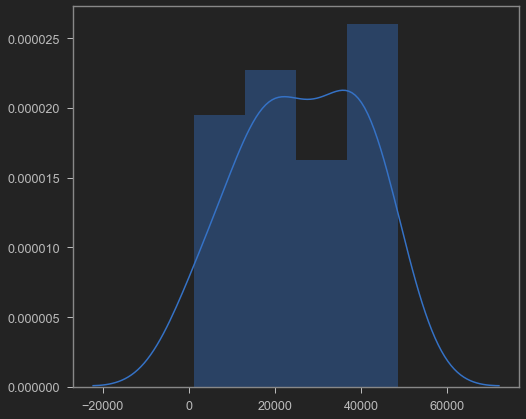

In [58]:
sns.distplot(df[df['Capital-gain'] == 99999].index);

#### Removing rows, where Capital-gain = 99999:

In [59]:
df.drop(df[df['Capital-gain'] == 99999].index, inplace=True)

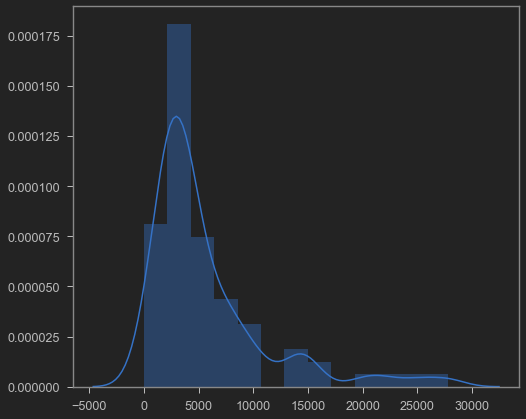

In [60]:
sns.distplot(df['Capital-gain'].unique());

### Capital loss:

In [61]:
df['Capital-loss'].value_counts()

0       4644
1902      24
1977      21
1887      17
1590      12
1485       7
1669       6
1408       6
1672       6
1740       6
1980       6
1564       5
1848       5
1876       5
1741       4
2415       4
1573       4
2002       4
2258       4
1579       4
1602       4
1974       4
2339       3
1628       3
2149       3
2205       3
2001       3
2377       3
2824       3
625        2
1726       2
1340       2
1719       2
2129       2
1380       1
1092       1
1504       1
2246       1
2206       1
2042       1
2057       1
2603       1
2392       1
1944       1
213        1
2547       1
2444       1
2472       1
653        1
323        1
1617       1
1755       1
1721       1
3900       1
2163       1
2179       1
2267       1
1594       1
1411       1
Name: Capital-loss, dtype: int64

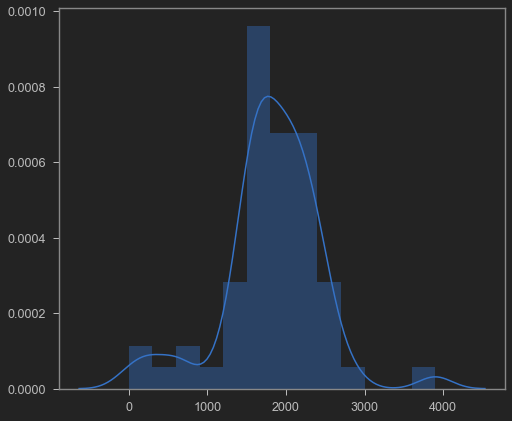

In [62]:
sns.distplot(df['Capital-loss'].unique());

### Work hours per week

In [63]:
df['Week-Hours'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 70, 72,
       74, 75, 76, 77, 78, 80, 84, 86, 89, 90, 95, 98, 99], dtype=int64)

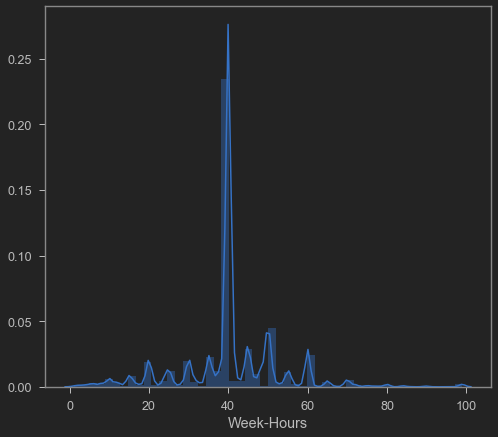

In [64]:
sns.distplot(df['Week-Hours']);

It is very unlikely someone works (especially effectively) 99 hours per week but let's assume they are <u>not</u> missing values but rather outliers.

In [65]:
df[df['Week-Hours'] == 99]

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
10986,38,Private,111499,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,1977,99,United-States,1
8393,50,Self-emp-inc,119099,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,99,United-States,1
27809,30,Private,39386,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,99,United-States,0
33462,37,Private,112158,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,7688,0,99,United-States,1
34639,33,State-gov,162705,Some-college,10,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,1
44675,37,Self-emp-not-inc,119992,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,0
41238,73,Self-emp-not-inc,228899,7th-8th,4,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,99,United-States,0
18603,33,Self-emp-not-inc,67482,Assoc-voc,11,Divorced,Other-service,Unmarried,White,Female,0,0,99,United-States,0
4086,50,?,174964,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,0
42994,42,Private,174295,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,99,United-States,0


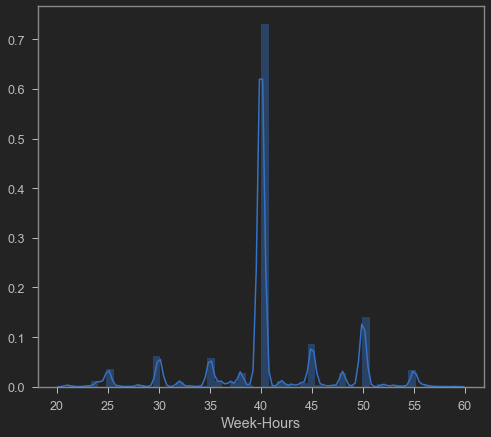

In [66]:
sns.distplot(df[(df['Week-Hours'] > 20) & (df['Week-Hours'] < 60)]['Week-Hours']);

It looks like 50-hour wokring week is the second most common weekly worktime. 

### Native country:

In [67]:
df['Native-country'].sort_values().unique()

array([' ?', ' Cambodia', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Honduras', ' Hong', ' Hungary', ' India', ' Iran', ' Ireland',
       ' Italy', ' Jamaica', ' Japan', ' Laos', ' Mexico', ' Nicaragua',
       ' Outlying-US(Guam-USVI-etc)', ' Peru', ' Philippines', ' Poland',
       ' Portugal', ' Puerto-Rico', ' Scotland', ' South', ' Taiwan',
       ' Thailand', ' Trinadad&Tobago', ' United-States', ' Vietnam',
       ' Yugoslavia'], dtype=object)

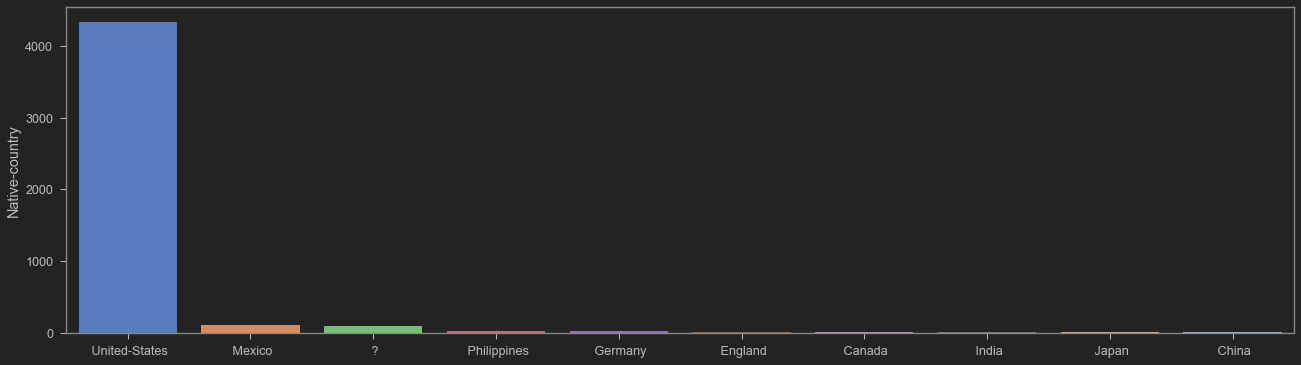

In [68]:
plt.figure(figsize=(22,6))
sns.barplot(x=df['Native-country'].value_counts().head(10).index, 
            y=df['Native-country'].value_counts().head(10),
            palette='muted');

The vast majority comes from USA. The count for other countries is the following:

In [69]:
df[df['Native-country'] != ' United-States']['Native-country'].value_counts()

 Mexico                        102
 ?                              91
 Philippines                    32
 Germany                        23
 England                        17
 Canada                         16
 Japan                          15
 India                          15
 Cuba                           14
 El-Salvador                    14
 Puerto-Rico                    14
 China                          14
 Vietnam                        13
 Portugal                       11
 Columbia                       11
 South                          10
 Haiti                           9
 Dominican-Republic              9
 Jamaica                         9
 Poland                          8
 Guatemala                       8
 Italy                           7
 Taiwan                          7
 France                          6
 Peru                            6
 Iran                            5
 Trinadad&Tobago                 5
 Scotland                        5
 Greece             

## Replace "?" with NaN

In [70]:
df = df.replace({' ?': np.nan})

In [71]:
df

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
7762,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,0
23881,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,0
30507,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,0
28911,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,0
19484,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43114,57,Private,366421,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,Mexico,0
5042,25,Private,371987,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
7027,64,NaN,143716,Masters,14,Married-civ-spouse,NaN,Husband,White,Male,0,0,2,United-States,0
36588,23,Private,142566,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0


## Inspecting really missing values:

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4858 entries, 7762 to 29572
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             4858 non-null   int64 
 1   Workclass       4566 non-null   object
 2   FNLWGT          4858 non-null   int64 
 3   Education       4858 non-null   object
 4   Education-num   4858 non-null   int64 
 5   Marital-status  4858 non-null   object
 6   Occupation      4566 non-null   object
 7   Relationship    4858 non-null   object
 8   Race            4858 non-null   object
 9   Sex             4858 non-null   object
 10  Capital-gain    4858 non-null   int64 
 11  Capital-loss    4858 non-null   int64 
 12  Week-Hours      4858 non-null   int64 
 13  Native-country  4767 non-null   object
 14  Salary          4858 non-null   int64 
dtypes: int64(7), object(8)
memory usage: 607.2+ KB


In [73]:
df.isnull().sum()

Age                 0
Workclass         292
FNLWGT              0
Education           0
Education-num       0
Marital-status      0
Occupation        292
Relationship        0
Race                0
Sex                 0
Capital-gain        0
Capital-loss        0
Week-Hours          0
Native-country     91
Salary              0
dtype: int64

### Rows with missing values:

In conclusion, there are missing values in the following columns: 'Workclass', 'Occupation', 'Native-country'. The rows are exactly:

In [74]:
df[df.isnull().any(axis=1)]

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
36230,40,NaN,246862,Bachelors,13,Widowed,NaN,Not-in-family,White,Female,0,0,8,United-States,0
2372,74,NaN,340939,9th,5,Married-civ-spouse,NaN,Husband,White,Male,3471,0,40,United-States,0
24735,60,NaN,141221,Bachelors,13,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,2163,25,South,0
31220,56,NaN,425497,Assoc-acdm,12,Married-civ-spouse,NaN,Husband,White,Male,0,0,20,United-States,0
20757,17,NaN,151141,10th,6,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19764,22,NaN,228480,HS-grad,9,Married-civ-spouse,NaN,Own-child,White,Female,0,0,20,United-States,0
32636,17,NaN,165361,10th,6,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
23109,17,NaN,215743,11th,7,Never-married,NaN,Own-child,White,Male,0,0,40,United-States,0
19706,22,NaN,255969,12th,8,Never-married,NaN,Not-in-family,White,Male,0,0,48,United-States,0


## Categorical Imputing using SimpleImputer
Using "most frequent" value method in this case: <br>
Note: SimpleImputer returns an array and we loose column types (to be adressed a few lines below):

In [75]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
df_filled = imputer.fit_transform(df)

df = pd.DataFrame(df_filled, columns=["Age", "Workclass", "FNLWGT", "Education", "Education-num", "Marital-status", 
                                      "Occupation", "Relationship", "Race", "Sex", "Capital-gain", "Capital-loss", 
                                      "Week-Hours", "Native-country", "Salary"])
df

,Age,Workclass,FNLWGT,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Week-Hours,Native-country,Salary
0,18,Private,423024,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,20,United-States,0
1,17,Private,178953,12th,8,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,0
2,25,Local-gov,348986,HS-grad,9,Never-married,Handlers-cleaners,Other-relative,Black,Male,0,0,40,United-States,0
3,20,Private,218215,Some-college,10,Never-married,Sales,Own-child,White,Female,0,0,30,United-States,0
4,47,Private,244025,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,Amer-Indian-Eskimo,Male,0,0,56,Puerto-Rico,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,57,Private,366421,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,Mexico,0
4854,25,Private,371987,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,0
4855,64,Private,143716,Masters,14,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,2,United-States,0
4856,23,Private,142566,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,0


Simple Imputer gives back a numpy array. Re-initializing a new dataframe results in loosing the dtypes of the initial columns:

In [76]:
df.dtypes

Age               object
Workclass         object
FNLWGT            object
Education         object
Education-num     object
Marital-status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital-gain      object
Capital-loss      object
Week-Hours        object
Native-country    object
Salary            object
dtype: object

Assigning back the numerical columns so that e.g. mean() etc. can be used:

In [77]:
df['Age'] = df['Age'].astype(int)
df['FNLWGT'] = df['FNLWGT'].astype(int)
df['Education-num'] = df['Education-num'].astype(int)
df['Capital-gain'] = df['Capital-gain'].astype(int)
df['Capital-loss'] = df['Capital-loss'].astype(int)
df['Week-Hours'] = df['Week-Hours'].astype(int)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4858 entries, 0 to 4857
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             4858 non-null   int32 
 1   Workclass       4858 non-null   object
 2   FNLWGT          4858 non-null   int32 
 3   Education       4858 non-null   object
 4   Education-num   4858 non-null   int32 
 5   Marital-status  4858 non-null   object
 6   Occupation      4858 non-null   object
 7   Relationship    4858 non-null   object
 8   Race            4858 non-null   object
 9   Sex             4858 non-null   object
 10  Capital-gain    4858 non-null   int32 
 11  Capital-loss    4858 non-null   int32 
 12  Week-Hours      4858 non-null   int32 
 13  Native-country  4858 non-null   object
 14  Salary          4858 non-null   object
dtypes: int32(6), object(9)
memory usage: 455.6+ KB


## Data exploration:

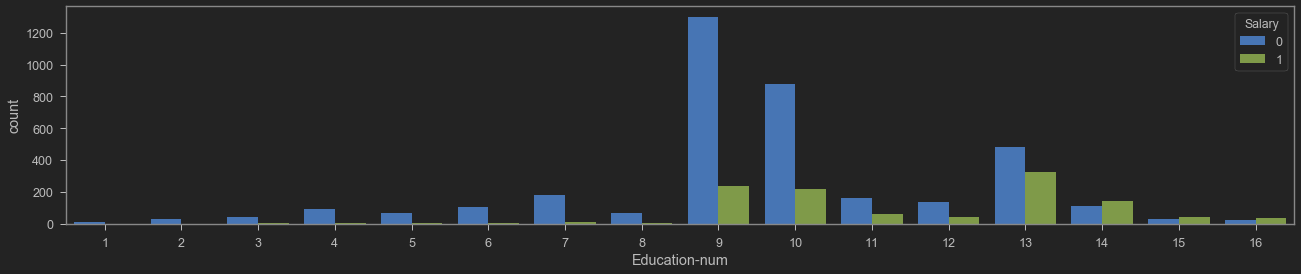

In [79]:
plt.figure(figsize=(22,4))
sns.countplot(df['Education-num'],hue=df['Salary']);

### Chances of >50k Salary by education number:

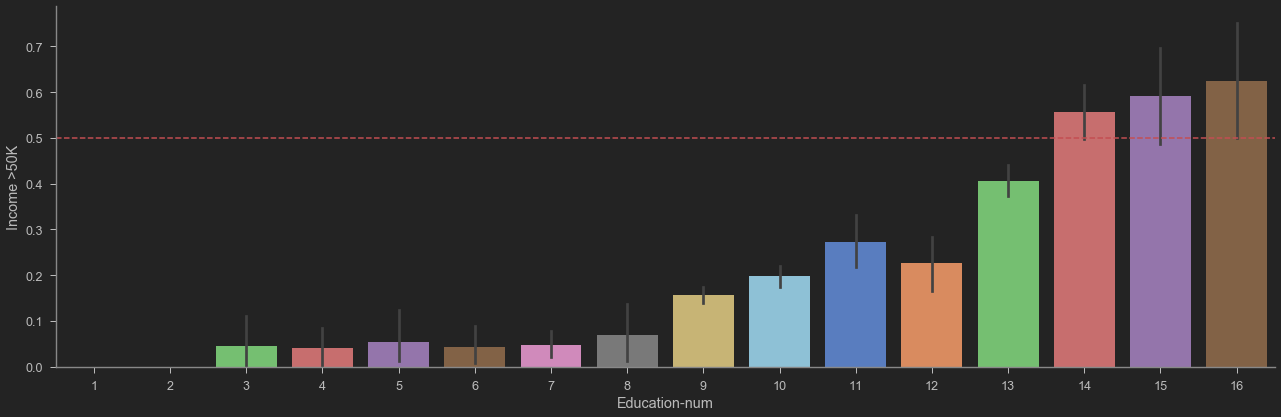

In [80]:
g = sns.catplot(x="Education-num", y="Salary", data=df,
                   kind="bar", 
                   height=6,
                   aspect=3,
                   palette = "muted");
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

### Chances of >50k Salary by work class:

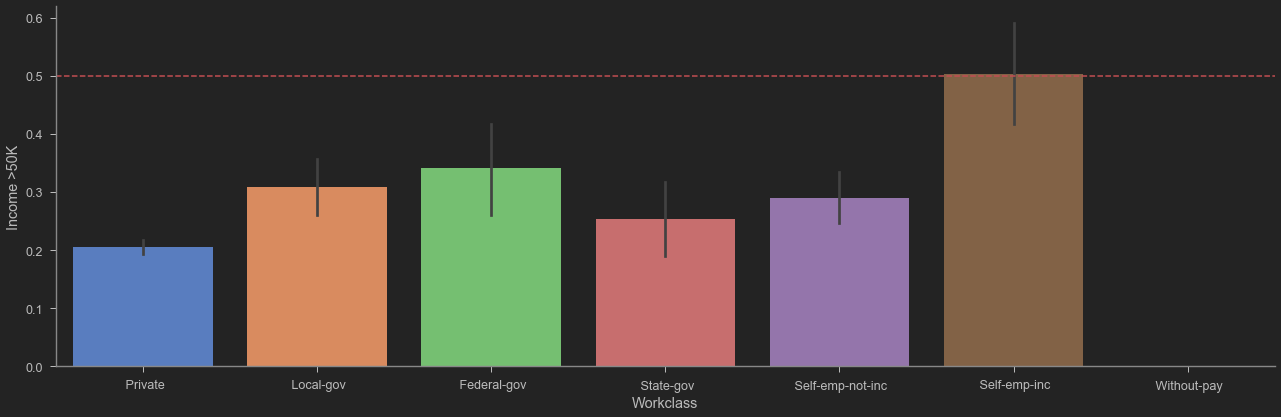

In [81]:
g = sns.catplot(x="Workclass", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=3, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

### Workclass and worktime:

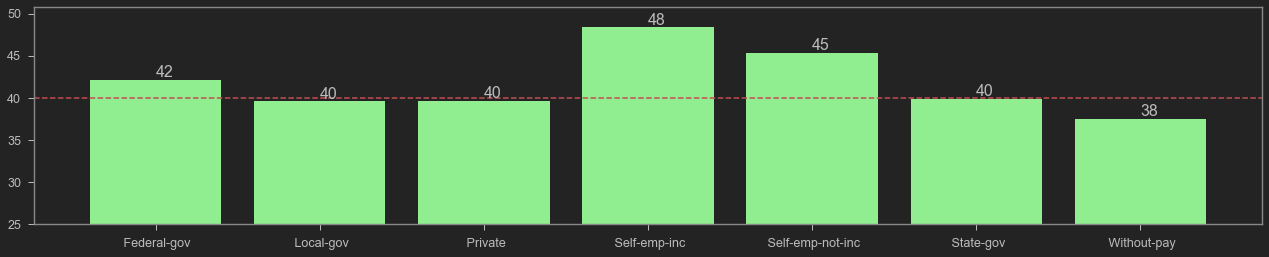

In [82]:
ind = df.groupby(by='Workclass')['Week-Hours'].mean().index
val = df.groupby(by='Workclass')['Week-Hours'].mean()

plt.figure(figsize=(22,4))
plt.bar(ind, val, color='lightgreen')

for index, value in enumerate(val):
    plt.text(index, value, str(round(value)), fontsize=16, verticalalignment='bottom')

plt.axhline(y=40, color='r', linestyle='--')
plt.ylim(25);

In [83]:
ind

Index([' Federal-gov', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay'],
      dtype='object', name='Workclass')

In [84]:
val

Workclass
 Federal-gov         42.099379
 Local-gov           39.577922
 Private             39.604518
 Self-emp-inc        48.359712
 Self-emp-not-inc    45.354115
 State-gov           39.855491
 Without-pay         37.500000
Name: Week-Hours, dtype: float64

### Chances of >50k Salary by occupation:

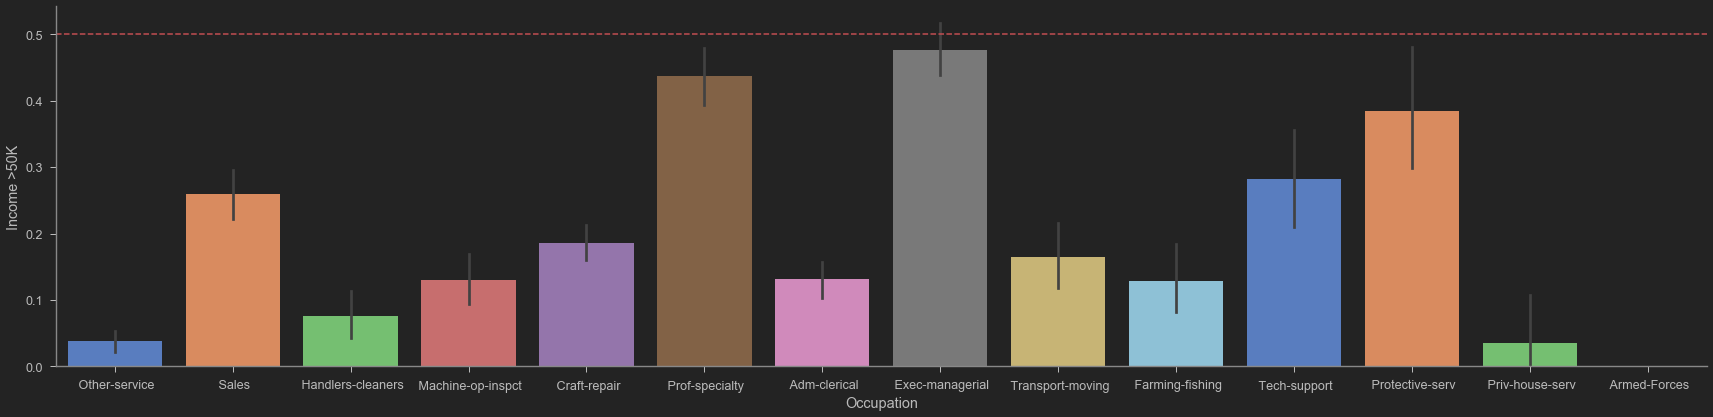

In [85]:
g = sns.catplot(x="Occupation", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=4, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

### Chances of >50k Salary by marital status:

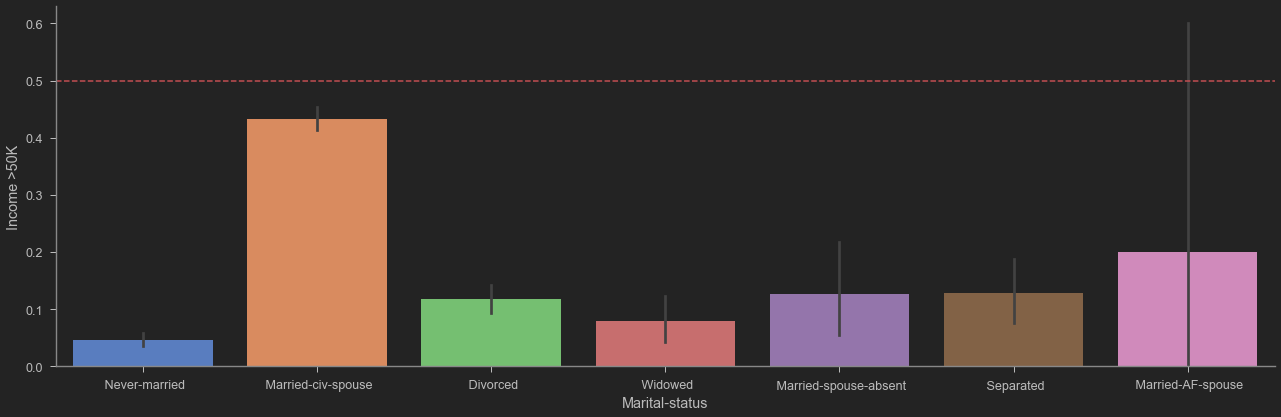

In [86]:
g = sns.catplot(x="Marital-status", y="Salary", data=df,
                   kind="bar", 
                   height=6, 
                   aspect=3, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

### Chances of >50k Salary by age (career years between the age of 25 and 65):

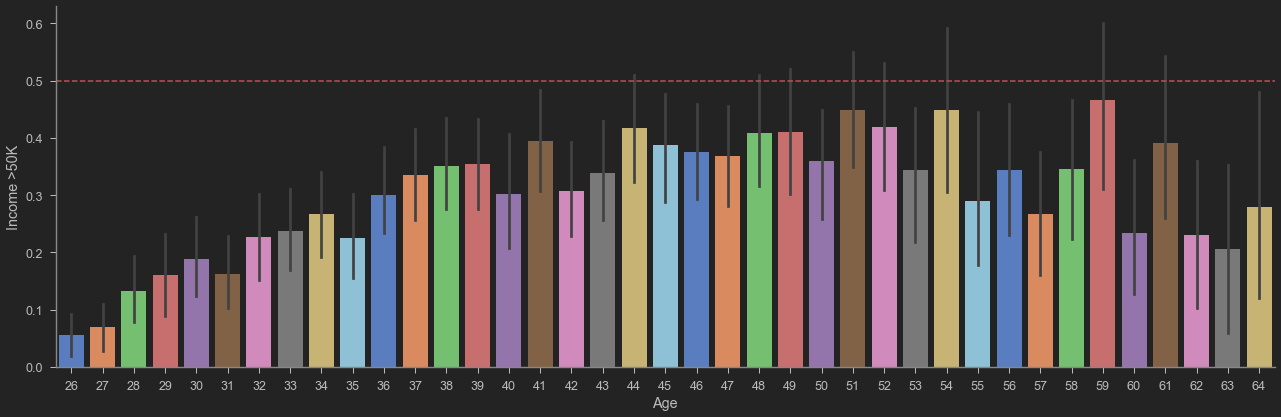

In [87]:
g = sns.catplot(x="Age", y="Salary", data=df[(df['Age']>25) & (df['Age']<65)],
                   kind="bar", 
                   height=6, 
                   aspect=3, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

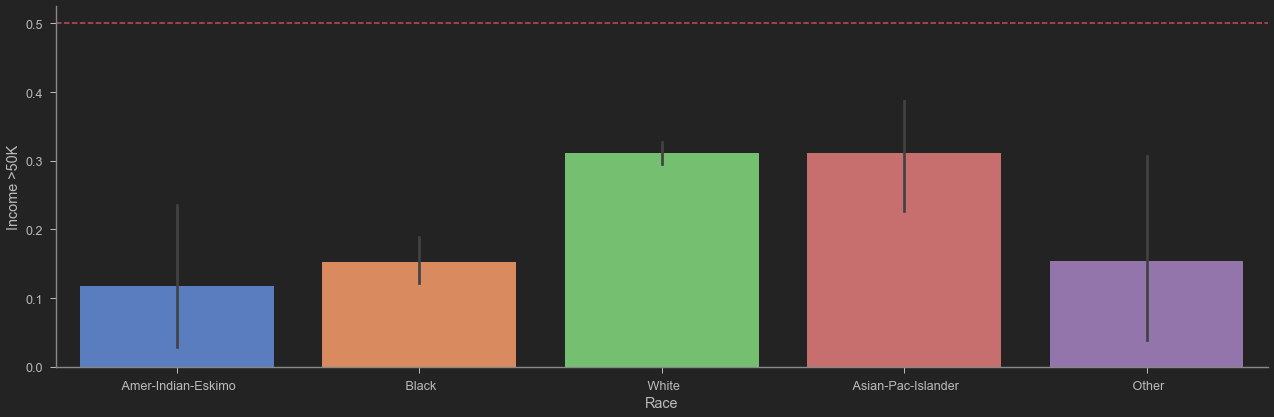

In [88]:
g = sns.catplot(x="Race", y="Salary", data=df[(df['Age']>25) & (df['Age']<65)],
                   kind="bar",
                   height=6, 
                   aspect=3, 
                   palette='muted');
plt.axhline(y=0.5, color='r', linestyle='--')
g = g.set_ylabels("Income >50K");

## DataFrame Backup:

In [89]:
df_backup = df.copy()

## Creating dummies for categorical variables:

In [90]:
df = pd.get_dummies(df, drop_first=True)

In [91]:
df

,Age,FNLWGT,Education-num,Capital-gain,Capital-loss,Week-Hours,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Salary_1
0,18,423024,9,0,0,20,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,17,178953,8,0,0,20,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,25,348986,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,20,218215,10,0,0,30,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,47,244025,9,0,0,56,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4853,57,366421,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4854,25,371987,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4855,64,143716,14,0,0,2,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4856,23,142566,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Renaming target column:
(Because creating dummies renamed it to 'Salary_1')

In [92]:
df.rename(columns={'Salary_1':'Salary'}, inplace=True)

## Train-Test set split

In [93]:
from sklearn.model_selection import train_test_split

y = df['Salary']
X = df.drop(['Salary'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scaling the data
Not a must in logistic regression. Needed for KNN, SVM and Kernel-SVM because they are distance-based.

In [94]:
continuous_columns = ['Age', 'FNLWGT', 'Education-num', 'Capital-gain', 'Capital-loss', 'Week-Hours']

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train.loc[:, continuous_columns] = scaler.fit_transform(X_train.loc[:, continuous_columns])
X_test.loc[:, continuous_columns] = scaler.transform(X_test.loc[:, continuous_columns])

C:\Users\PDL3\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\PDL3\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Model selection:

In [96]:
#Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Model evaluation:
from sklearn import model_selection
from sklearn.metrics import make_scorer, accuracy_score, f1_score

#Saving the models for later:
import pickle
import os.path

accuracies = []
f1_scores = []
    
models = [('LR', LogisticRegression(max_iter=1000)),
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC(probability=True)),
          ('NB', GaussianNB()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier(n_estimators=10)),
          ('XGB', XGBClassifier())]
    
for name, model in models:
    
    print(f'Current model: {model} \n')
    model.fit(X_train, y_train)
    
    #Cross validation:
    scoring_metrics = {'accuracy': make_scorer(accuracy_score), 
                       'f1_score': make_scorer(f1_score)}
    accuracy_results = model_selection.cross_validate(model, X_train, y_train, cv=10, scoring=scoring_metrics)
    
    #Retrieve the scores:
    model_accuracy = accuracy_results['test_accuracy']
    model_f1_score = accuracy_results['test_f1_score']
       
    #Append the lists:
    accuracies.append(model_accuracy)
    f1_scores.append(model_f1_score)
       
    #Save each model to disk: 
    current_directory = os.getcwd()
    #Create folder "Models":
    final_directory = os.path.join(current_directory, r'Models')
    if not os.path.exists(final_directory):
        os.makedirs(final_directory)
    
    #Use picke to save the model:    
    filename = final_directory+'\\'+name+'.sav'
    pickle.dump(model, open(filename, 'wb'))
    
    #Use picke to save the accuracies:    
    filename = final_directory+'\\'+'Accuracies.sav'
    pickle.dump(accuracies, open(filename, 'wb'))
    
    #Use picke to save the F1-scores:    
    filename = final_directory+'\\'+'F1_scores.sav'
    pickle.dump(f1_scores, open(filename, 'wb'))

Current model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) 

Current model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 

Current model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False) 

Current model: GaussianNB(priors=None, var_smoothing=1e-09) 

Current model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=N

## Load models from disk:

In [97]:
#model_loaded = pickle.load(open('.\\Models\\name.sav', 'rb'))
#predictions_loaded = model_loaded.score(X_test, y_test)

In [130]:
#accuracies = pickle.load(open('.\\Models\\Accuracies.sav', 'rb'))
#f1_scores = pickle.load(open('.\\Models\\F1_scores.sav', 'rb'))

#### Lists to numpy arrays:

In [104]:
accuracies = np.asarray(accuracies)
f1_scores = np.asarray(f1_scores)

#### DataFrame of F1 scores:

In [105]:
f1_df = pd.DataFrame(np.transpose(f1_scores), columns=['LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB'])
acc_df = pd.DataFrame(np.transpose(accuracies), columns=['LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB'])

### Cross-Validation F1-scores of each (k-th) fold per model:

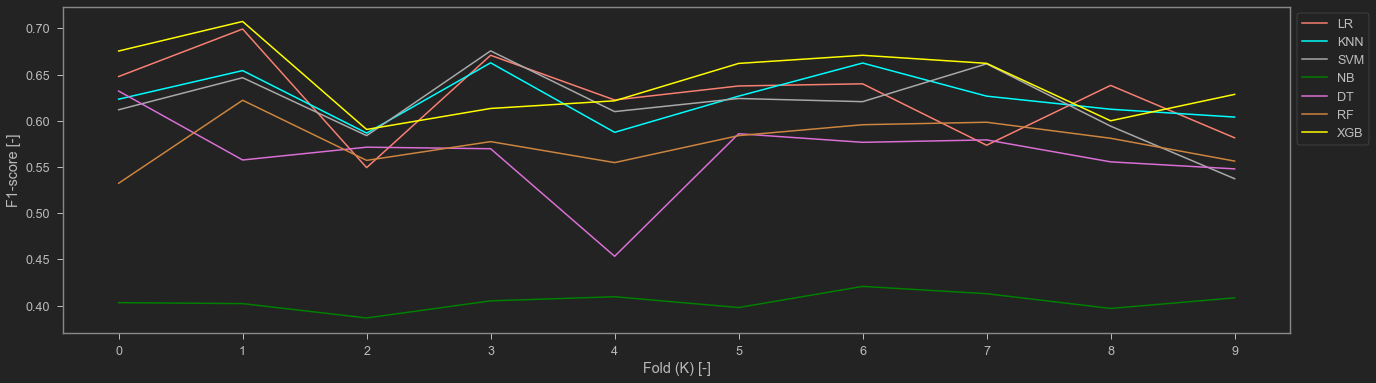

In [107]:
import cycler
plt.figure(figsize=(22,6))

plt.plot(f1_df)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color = ['salmon','cyan', 'darkgrey', 'green', 'orchid', 'peru', 'yellow'])

plt.xticks(np.arange(10))
plt.xlabel('Fold (K) [-]')
plt.ylabel('F1-score [-]')
plt.legend(f1_df.columns, bbox_to_anchor=(1.0, 1.0));

### Cross-Validation Accuracies of each (k-th) fold per model:

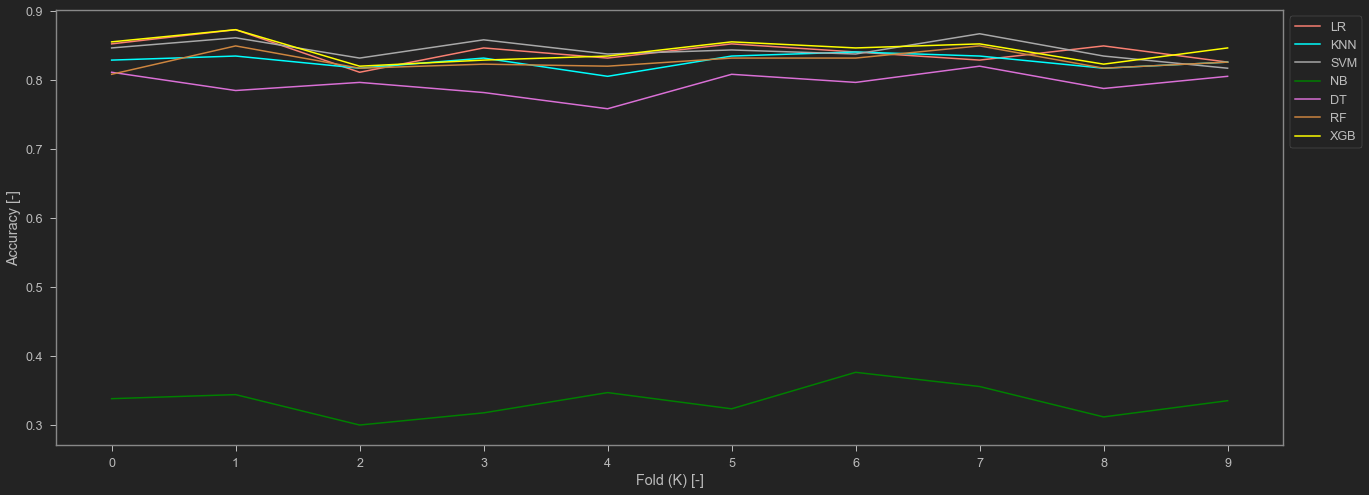

In [108]:
plt.figure(figsize=(22,8))

plt.plot(acc_df)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color = ['salmon','cyan', 'darkgrey', 'green', 'orchid', 'peru', 'yellow'])

plt.xticks(np.arange(10))
plt.xlabel('Fold (K) [-]')
plt.ylabel('Accuracy [-]')
plt.legend(f1_df.columns, bbox_to_anchor=(1.0, 1.0));

### Cross Validation Mean F1-scores:

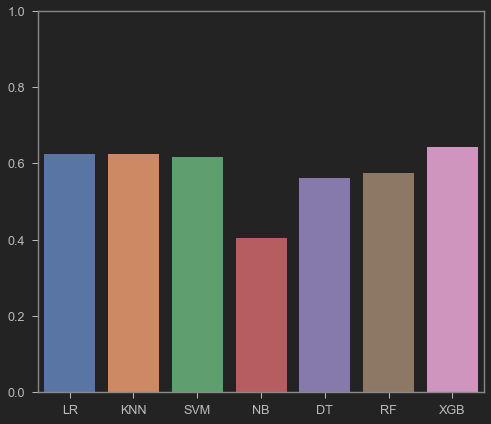

In [109]:
ax = sns.barplot(f1_df.columns, f1_df.mean(), palette='deep')
ax.set(ylim=(0.0, 1))
ax.set_xticklabels(['LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB']);

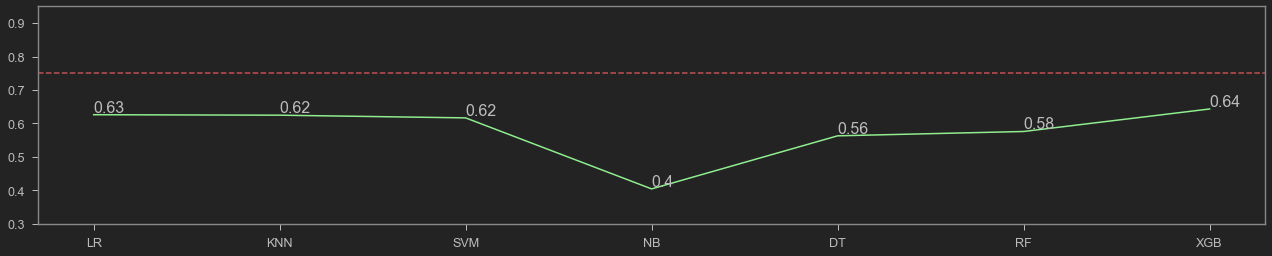

In [128]:
ind_f1 = f1_df.columns
val_f1 = f1_df.mean()

plt.figure(figsize=(22,4))
plt.plot(ind_f1, val_f1, color='lightgreen')

for index, value in enumerate(val_f1):
    plt.text(index, value, str(round(value, 2)), fontsize=16, verticalalignment='bottom')

plt.axhline(y=0.75, color='r', linestyle='--')
plt.ylim(0.30,0.95);

### Cross Validation Mean Accuracy:

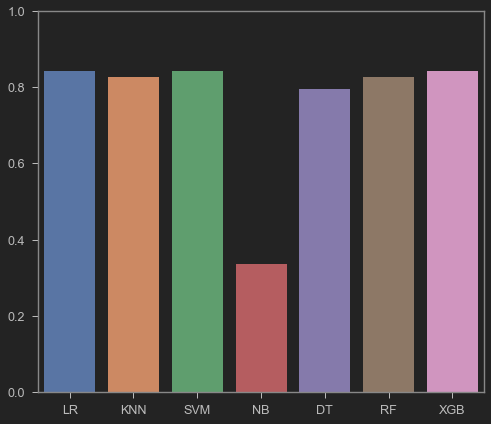

In [111]:
ax = sns.barplot(acc_df.columns, acc_df.mean(), palette='deep')
ax.set(ylim=(0.0, 1))
ax.set_xticklabels(['LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB']);

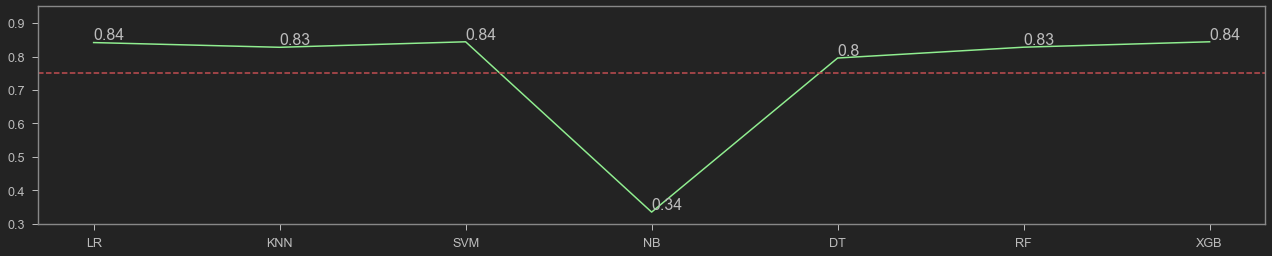

In [129]:
ind_acc = acc_df.columns
val_acc = acc_df.mean()

plt.figure(figsize=(22,4))
plt.plot(ind_acc, val_acc, color='lightgreen')

for index, value in enumerate(val_acc):
    plt.text(index, value, str(round(value, 2)), fontsize=16, verticalalignment='bottom')

plt.axhline(y=0.75, color='r', linestyle='--')
plt.ylim(0.30,0.95);

# Some remarks:
<br>
It is important to note that these are the results of the models with <b>DEFAULT</b> parameters. <br><br>

For example: <br>
Logistic Regression could have specified e.g. C (inverse of regularization strength - smaller values specify stronger regularization), class weights, penalty norm (default='L2') or twhether to add/remove intercept term. <br>

KNN could have different number of neighbors (K). <br>

SVM could have different threshhold (Epsilon). <br>

Naive Bayes could have specified e.g. 'prior probabilities of the classes'. <br>

Decision Tree could have specified e.g. max depth or criterion to measure the quality of a split (default='gini'). <br>

Decision Tree could have specified e.g. the number of trees in the forest (important parmeter). <br>

XGB is tricky to tune but it could have specified e.g. n_estimators, learning_rate, max_depth or gamma (minimum loss reduction required to make a further partition on a leaf node of the tree.) 

## Boxplot - Accuracy

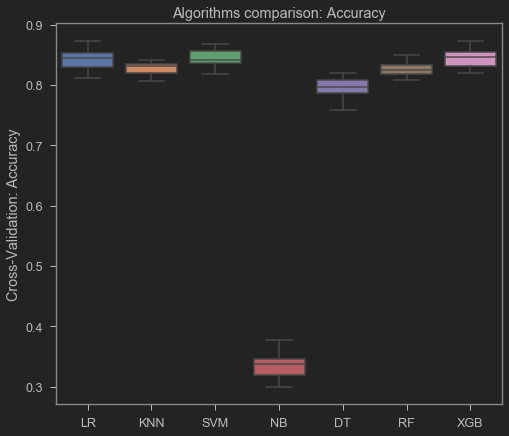

In [113]:
ax = sns.boxplot(data=acc_df, palette='deep')
ax.set_title('Algorithms comparison: Accuracy')
ax.set_ylabel('Cross-Validation: Accuracy');

## Boxplot - F1-score

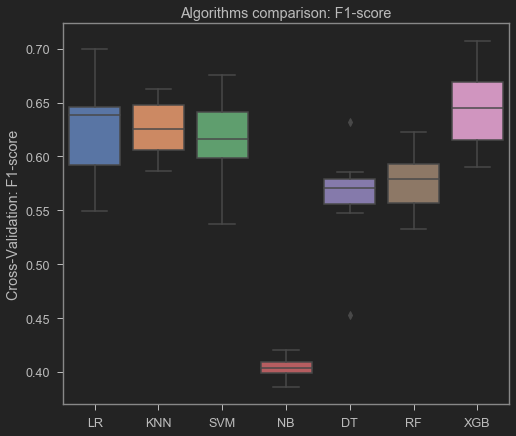

In [114]:
ax = sns.boxplot(data=f1_df, palette='deep')
ax.set_title('Algorithms comparison: F1-score')
ax.set_ylabel('Cross-Validation: F1-score');

In [115]:
acc_df.mean().sort_values(ascending=False)

XGB    0.844118
SVM    0.844118
LR     0.841765
RF     0.827941
KNN    0.827647
DT     0.795588
NB     0.335000
dtype: float64

In [116]:
f1_df.mean().sort_values(ascending=False)

XGB    0.643223
LR     0.626096
KNN    0.624695
SVM    0.616608
RF     0.575953
DT     0.562977
NB     0.404345
dtype: float64

### Last model (XGB):

In [117]:
prediction_model = model.predict(X_test)

## Conusion matrix

In [118]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, prediction_model)

array([[1026,   93],
       [ 157,  182]], dtype=int64)

Text(43.0, 0.5, 'Actual')

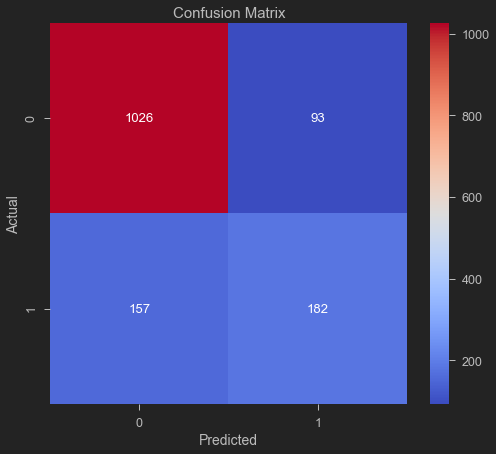

In [119]:
confusion_matrix_test = confusion_matrix(y_test,prediction_model)

sns.heatmap(confusion_matrix_test, 
            annot=True, 
            fmt="d", 
            cmap="coolwarm")

plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted",fontsize=14)
plt.ylabel("Actual",fontsize=14)

In [120]:
print(classification_report(y_test, prediction_model))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1119
           1       0.66      0.54      0.59       339

    accuracy                           0.83      1458
   macro avg       0.76      0.73      0.74      1458
weighted avg       0.82      0.83      0.82      1458



## AUC - Area Under (ROC) Curve:
Indicates how well the probabilities from the positive class are separated from the negative class.

In [121]:
from sklearn.metrics import roc_curve, roc_auc_score

### Load models saved during model selection from disk:

In [122]:
# 'LR','KNN', 'SVM', 'NB', 'DT','RF', 'XGB'

model_predict_proba = dict()

for saved_model in ['LR','KNN', 'SVM','RF', 'XGB']:

    model_loaded = pickle.load(open('.\\Models\\'+saved_model+'.sav', 'rb'))
    model_predict_proba[saved_model] = model_loaded.predict_proba(X_test)[:,1]

### ROC curve method 
Receiver operating characteristic (ROC) is used for illustrating the performance of a binary (two class) classifier.

fpr - Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i]. <br>

tpr - Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i]. <br>

threshold - Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

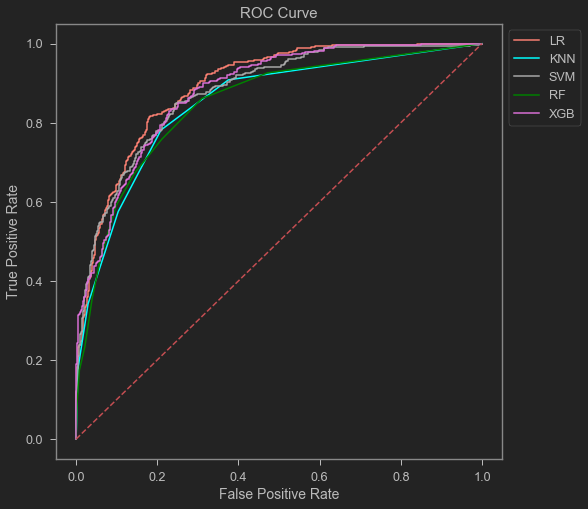

In [123]:
plt.figure(figsize=(8,8))

for key, value in model_predict_proba.items():
    
    fpr, tpr, thresholds  = roc_curve(y_test, model_predict_proba[key])
    plt.plot(fpr, tpr)
    plt.rcParams["axes.prop_cycle"] = plt.cycler(color = ['salmon','cyan', 'darkgrey', 'peru', 'yellow'])
        
    plt.xlabel('False Positive Rate',fontsize=14)
    plt.ylabel('True Positive Rate',fontsize=14)
    plt.title('ROC Curve',fontsize=15)

plt.legend(model_predict_proba.keys(), bbox_to_anchor=(1.0, 1.0));
plt.plot([0, 1], [0, 1], 'r--') #auxiliary dashed red line
plt.show()

### Checking DT and NB:

In [124]:
# for key, value in model_predict_proba.items():
    
#     if (key == 'NB') | (key == 'DT'):
#         fpr, tpr, thresholds  = roc_curve(y_test, model_predict_proba[key])
#         plt.plot(fpr, tpr)
#     else:
#         print(f'NB or DT not loaded')

Total Execution time:

In [3]:
print(datetime.now() - startTime)

0:00:48.210111
